In [12]:
from qgis.core import QgsProject
project = QgsProject.instance()
project.read('Beginners_Guide.qgz')
print(project.fileName())

Beginners_Guide.qgz


In [21]:
layer_names = [l.name() for l in project.mapLayers().values()]
layer_names

['OpenStreetMap', 'banks', 'river']

In [1]:
%matplotlib inline
from shapely.geometry import Point
from geopandas import datasets, GeoDataFrame, read_file
from geopandas.tools import overlay
import geopandas as gpd
import contextily as cx

In [28]:
shps_i = r'Beginners Guide to ArcGIS Desktop\Shapefiles'
shps_f = r'Beginners Guide to ArcGIS Desktop\Outputs'

my_shps = {
	'banks':'banks.shp',
	'roi1':'region_of_interest_1.shp',
	'roi2':'region_of_interest_2.shp',
	'river':'river.shp',
}
def get_file(path):
	return read_file(f'{shps_i}\\{path}')
lrs = {name:get_file(path) for name,path in my_shps.items()}


In [33]:
def to_newfiles(name):
	return f"{shps_f}\\{name}.shp"

lrs['roi1'].clip(lrs['river']).to_file(to_newfiles("clip_rivers"))
lrs['roi2'].clip(lrs['banks']).to_file(to_newfiles("clip_banks"))

C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [35]:
lrs['roi1'].intersection(lrs['roi2']).to_file(to_newfiles("roi_intersection"))
lrs['roi1'].union(lrs['roi2']).to_file(to_newfiles("roi_union"))


C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,
C:\Users\dnoell\Anaconda3\envs\gis\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [36]:
lrs['river'].dissolve(by='name').to_file(to_newfiles("rivers_dissolve"))

<AxesSubplot:>

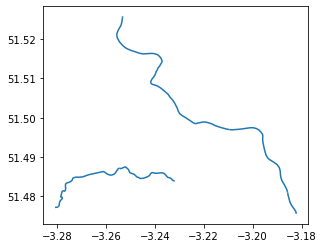

In [31]:
clip_rivers.plot()

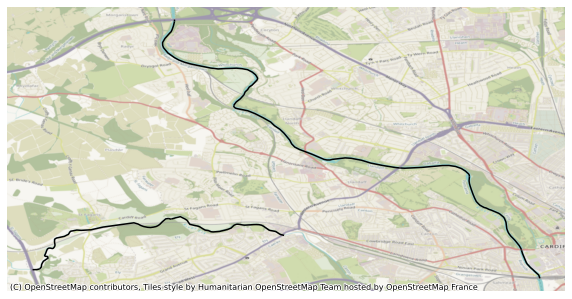

In [39]:
# my_layers['banks'].plot()
# my_layers['roi1'].plot()
# my_layers['roi1'].explore()
lrs = my_layers



# L1.crs.name
# L2.crs.name

# L2.plot()
# L1.overlay(L2,how='intersection',keep_geom_type=False).plot()
ax = L1.clip(L2).plot(figsize=(10, 10), alpha=1, edgecolor='k')
cx.add_basemap(ax,crs=L1.crs,source=cx.providers.OpenStreetMap.HOT)
ax.set_axis_off()

In [26]:
cx.Place("Fresno")

ValueError: Could not retrieve map with parameters: -119.70935, 36.728449, -119.70836, 36.730442, zoom=20
{'ll': True, 'source': {'url': 'https://stamen-tiles-{s}.a.ssl.fastly.net/{variant}/{z}/{x}/{y}{r}.{ext}', 'html_attribution': 'Map tiles by <a href="http://stamen.com">Stamen Design</a>, <a href="http://creativecommons.org/licenses/by/3.0">CC BY 3.0</a> &mdash; Map data &copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors', 'attribution': 'Map tiles by Stamen Design, CC BY 3.0 -- Map data (C) OpenStreetMap contributors', 'subdomains': 'abcd', 'min_zoom': 0, 'max_zoom': 18, 'variant': 'terrain', 'ext': 'png', 'name': 'Stamen.Terrain'}}
Error: The specified zoom level of 20 is not valid for the current tile provider (valid zooms: 0 - 18).

<AxesSubplot:>

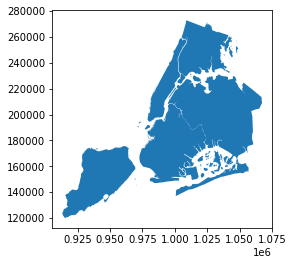

In [23]:
polydf.plot()